<a href="https://colab.research.google.com/github/barrafcm/projetos_data_science/blob/master/Viol%C3%AAncia_Estado_do_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>A violência no Estado do Rio de Janeiro: Observando o panorama histórico com a utilização de Data Science. </h1>

*Por Felipe Caldoncelli Barra Melo*

![Mauro Pimentel/AFP](https://conteudo.imguol.com.br/c/noticias/42/2017/10/06/22set2017---tiroteio-na-rocinha-favela-da-zona-sul-do-rio-de-janeiro-1507328842696_615x300.jpg)

O Rio de Janeiro é um dos estados mais impostantes do Brasil. Sua capital é a cidade turisticamente mais importante de nosso país, sendo nosso cartão postal para o mundo. 

O Estado do Rio de Janeiro possui uma região metropolitana bastante vasta, contando com divesrsos municípios. Um litoral encantador e movimentado, além de uma região serrana que lembra partes da Europa.

Infelizmente, não só de belezas vivem os fluminenses (como são desiganados os habitantes do estado do Rio de Janeiro). O dia a dia dessas pessoas é marcada também por um mal que assola todo o resto do Brasil, a violência.

Imagens de bandidos fortemente armados aumentam a sensação de insegurança de moradores e turistas. Costumamos a pensar que as coisas só pioram, mas será isto verdade?

Neste artigo traremos uma análise dos indicadores criminais para o Estado do Rio de Janeiro como um todo, sem fazer distinção entre regiões. A partir destes dados, oriundos do [Instituto de Segurança Pública do Estado]("http://www.ispdados.rj.gov.br/estatistica.html"), buscaremos tirar conclusões sobre o panorama da segurança pública no Rio de Janeiro.

## Dados

A série de dados estudada tem base em registros mensais, iniciando em janeiro de 1991 e finalizando em agosto de 2019.
Cada linha do dataset representa um mês. Existem 56 colunas de dados, estando as principais descritas abaixo:


O arquivo utilizado para esta análise foi tratado quanto a erros de leitura pelo cientista de dados Carlos Melo e pode ser encontrado [neste diretório.]("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")


Realizando a importação de biblioteca e arquivos

In [0]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")

Visualização do *dataset*:

Composição: 344 linhas e 56 colunas

In [3]:
df

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2


Verificação das informações das colunas

Podemos visualizar os cabeçalhos dos dados de forma a escolher quais as séries mais importantes para a análise.

In [0]:
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

A coluna referente ao ano da ocorrência foi renomeada  para fins de facilitar a compreensão de `vano` para `ano`.

In [0]:
df = df.rename(columns={'vano':'ano'})

A fim de analisar os tipos de dados e a quantidade de valores não nulos foi utilizado o método `info()` no DataFrame.

É possível observar que todas as variáveis são numéricas.

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ano                         344 non-null    int64  
 1   mes                         344 non-null    int64  
 2   hom_doloso                  344 non-null    int64  
 3   lesao_corp_morte            248 non-null    float64
 4   latrocinio                  344 non-null    int64  
 5   hom_por_interv_policial     260 non-null    float64
 6   tentat_hom                  344 non-null    int64  
 7   lesao_corp_dolosa           344 non-null    int64  
 8   estupro                     200 non-null    float64
 9   hom_culposo                 260 non-null    float64
 10  lesao_corp_culposa          248 non-null    float64
 11  roubo_comercio              344 non-null    int64  
 12  roubo_residencia            344 non-null    int64  
 13  roubo_veiculo               344 non

Os valores abaixo indicam o percentual de dados ausentes por variável.

Nas análises por variáveis específicas a ausencia de dados será melhor explorada, quando aplicável.

O mesmo será feito para a descrição e informações das variáveis utilizadas.

In [0]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

Utlizando o método `describe()` é possível verificar o resumo estatístico de cada variável do *dataset*

In [0]:
df.describe()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000,

###**Dados incompletos para o ano de 2019**

Para fins de comparação de série histórica anual, os dados de 2019, totalizados até o mês de agosto, gerariam gráficos imprecisos. 

Desta forma, visando preservar a fidedignidade das informações, optou-se pela exclusão dos meses de 2019 quando na comparação anual.

Foi criado um novo DataFrame que descosidera os dados de 2019:

In [0]:
df_sem_2019 = df.copy()

df_sem_2019.drop(df_sem_2019[df_sem_2019.ano == 2019].index, axis=0, inplace=True)

Checando a exclusão destes dados:

Percebe-se que os últimos valores são de dezembro de 2018.

In [0]:
df_sem_2019.tail()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
331,2018,8,360,6.0,13,176.0,535,4655,433.0,157.0,2267.0,535,109,3910,673,7261,1400,2,2.0,2170.0,4.0,62.0,12.0,2620,18760,1398,1553,733.0,1302.0,162.0,6944,12092,0.0,149.0,12.0,3615.0,1994,694.0,1141.0,201.0,3368,3050.0,587.0,1727.0,260.0,4532.0,377.0,24,4.0,2.0,0.0,555,10831,3910,65797.0,3
332,2018,9,382,7.0,14,108.0,509,5344,489.0,157.0,2504.0,463,103,4053,578,6756,1275,1,1.0,2182.0,9.0,160.0,16.0,2385,17982,1339,1419,655.0,1173.0,161.0,6686,11433,0.0,146.0,5.0,2809.0,1959,747.0,1062.0,183.0,2625,2798.0,470.0,1633.0,190.0,4666.0,386.0,17,1.0,4.0,0.0,511,10213,4053,62376.0,3
333,2018,10,383,2.0,11,127.0,491,5472,488.0,153.0,2382.0,454,95,4242,651,7360,1441,1,8.0,2477.0,9.0,83.0,18.0,2308,19147,1428,1597,735.0,1368.0,206.0,7036,12370,0.0,143.0,8.0,2959.0,1735,666.0,939.0,165.0,3176,2727.0,515.0,1105.0,171.0,4877.0,427.0,16,2.0,1.0,1.0,523,11278,4242,65589.0,3
334,2018,11,378,3.0,12,136.0,463,5277,424.0,153.0,2283.0,441,84,4074,725,7017,1384,5,3.0,2346.0,6.0,79.0,16.0,2363,18543,1325,1560,737.0,1357.0,176.0,6963,12118,1.0,121.0,4.0,2879.0,1716,664.0,931.0,160.0,2848,2754.0,489.0,1233.0,259.0,4657.0,410.0,24,2.0,1.0,0.0,529,10747,4074,63281.0,3
335,2018,12,346,5.0,13,88.0,447,5737,430.0,191.0,2590.0,434,108,3812,788,6459,1183,1,4.0,2144.0,16.0,73.0,13.0,2168,17203,1353,1772,620.0,1377.0,168.0,6893,12183,1.0,123.0,7.0,2696.0,1585,640.0,815.0,165.0,2502,2471.0,490.0,1147.0,217.0,4835.0,422.0,24,3.0,1.0,0.0,452,9786,3812,62043.0,3


# Análise dos principais indicadores

Discutir a Segurança Pública é sempre uma questão muito difícil. Do ponto de vista da análise dos dados, será utilizada uma abordagem que priorizará a observação das principais modalidades de crime.

## Homicídios Dolosos - `hom_doloso`

O homicídio doloso é caracterizado pela intenção do infrator em assasinar sua vítima. É, sem dúvida, um dos crimes mais chocantes para a sociedade e um forte indicador do nível de segurança. 

No gráfico abaixo é apresentado o número de homicídios dolosos no Estado do Rio de Janeiro por ano.

Percebe-se uma forte tendência de queda nos indicadores em duas ondas. A primeira iniciada após 1995 e segunda após 2005. A partir 2012 ocorre uma reversão do comportamento com variações até 2018.  

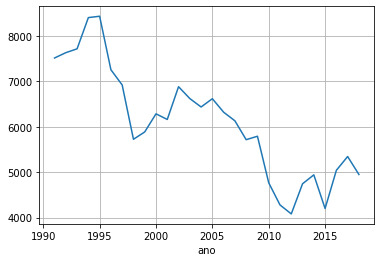

In [0]:
df_sem_2019.hom_doloso.groupby(df.ano).sum().plot(grid=True);

## Roubo a residências - `roubo_residencia`

Outro fator importante para o cidadão poder se sentrir seguro é perceber seu lar como local inviolável. Roubos a residências tem grande impacto na percepção das pessoas quanto a segurança da sua vizinhança e, portanto, são bons indicadores do nível de segurança pública.

O gráfico abaixo representa a quantidade de roubos a residência registrados por ano.

Chama a atenção a queda experessiva neste tipo de crime após 1992 e posterior aumento até 2002. Desde então, existe uma tendência de diminuição neste indicador.

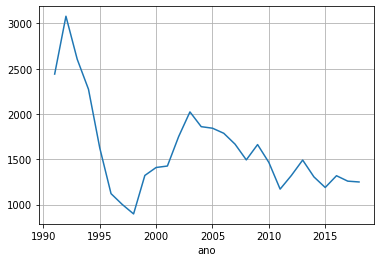

In [0]:
df_sem_2019.roubo_residencia.groupby(df.ano).sum().plot(grid=True);

## Latrocínio - `latrocinio`

Latrocínio é o roubo seguido de morte. É um dos crimes mais chocantes, pois, mesmo o assaltante tendo obtido sucesso em subtrair o bem almejado, acaba por assassinar a vítima.

O gráfico abaixo mostra o número de latrocínios por ano. 

Percebe-se maior variação nesse indicador com constantes altos e baixos. O menor número de ocorrências aumenta esta variabilidade.

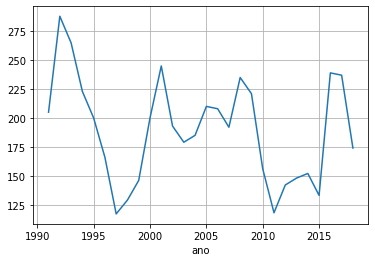

In [0]:
df_sem_2019.latrocinio.groupby(df.ano).sum().plot(grid=True);

## Roubo de Veículo - `roubo_veiculo`

O roubo de veículos é outro indicador importante para mensurar o nível da criminalidade. Nesta atividade criminosa o bandido se utiliza de violência para roubar o veículo.

Ao contrário da tendência geral de queda observada no número de homicídios dolosos e furtos a residência, o roubo de veículos vem crescendo rapidamente, principalmente após 2011.

Confira abaixo o número de ocorrências por ano:

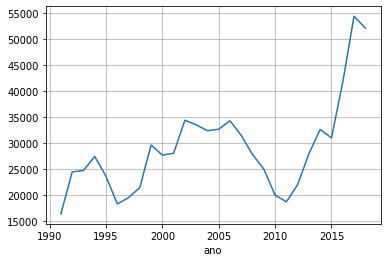

In [6]:
df_sem_2019.roubo_veiculo.groupby(df.ano).sum().plot(grid=True);

## Furto de Veículo - `furto_veiculos`

O furto de veículos se diferencia do roubo por não empregar violência durante o ato.

Ao contrário do que acontece com o número de roubos, a quantidade de furtos de veículos vem diminuindo ao longo do tempo.

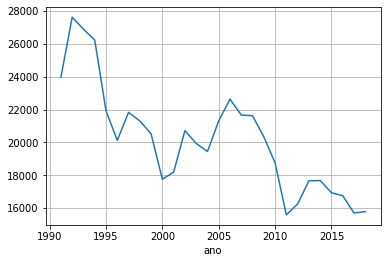

In [0]:
df_sem_2019.furto_veiculos.groupby(df.ano).sum().plot(grid=True);

## Roubo a transeunte - `roubo_transeunte`

O roubo a transeunte tem grande impacto na sensação de insegurança, pois acontece nas ruas das cidades e tem por característica a utilização de violência.

Percebe-se que há uma tendência geral de aumento neste tipo de crime.

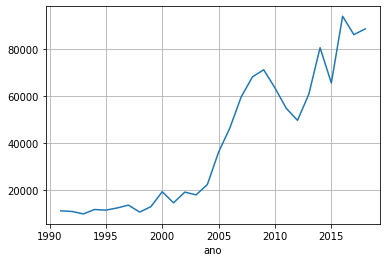

In [0]:
df_sem_2019.roubo_transeunte.groupby(df.ano).sum().plot(grid=True);

## Apreensão e Tráfico de drogas - `apreensao_drogas` e `trafico_drogas`

A atividade do tráfico de drogas costuma a ser apontada como tendo relação com outros tipos de crime. 


Percebe-se um aumento quase constante no número de apreensões de drogas, alternado por poucos períodos de queda.

A mesma tendência é observada nas ocorrências de tráfico de drogas (contabilizadas a partir de 2006).

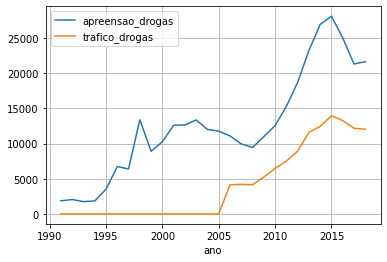

In [59]:
df_sem_2019[['apreensao_drogas','trafico_drogas']].groupby(df.ano).sum().plot(grid=True);

## Estupro - `estupro`

O número de estupros é um indicador importante de violência sexual.

É observada uma tendência de aumento entre 2003, início da série histórica, e 2012. A partir de então passa a diminuir, seguido de novo aumento de casos desde 2017.

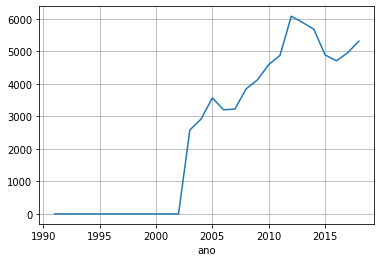

In [62]:
df_sem_2019.estupro.groupby(df.ano).sum().plot(grid=True);

## Homicídios por intervenção policial - `hom_por_interv_policial`

A violência policial é um assunto bastante discutido nos tempos atuais. A cidade do Rio de Janeiro, em especial, tem problemas notórios com a criminalidade organizada.

As operações policiais são comuns em muitas comunidades e, muitas vezes, deixam mortos.

O gráfico abaixo mostra o número de homicídios por intervenção policial:

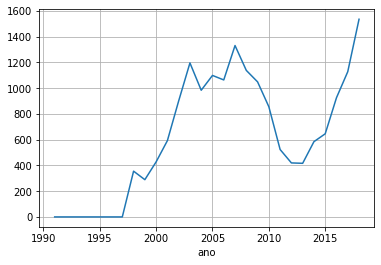

In [0]:
df_sem_2019.hom_por_interv_policial.groupby(df.ano).sum().plot(grid=True);

## Policiais Mortos em Serviço - `pol_militares_mortos_serv` e `pol_civis_mortos_serv`

Segundo especialistas, a Polícia do Rio de Janeiro é uma das que "mais mata, mas também, é uma das que mais morre".

O gráfico abaixo mostra o número de policiais militares e civis mortos em serviço. Não estão contabilizadas as mortes em período de folga.

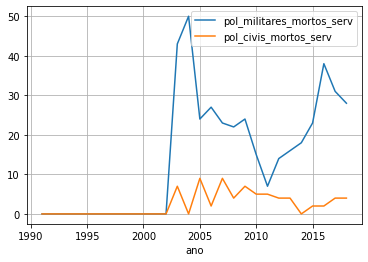

In [66]:
df_sem_2019.pol_militares_mortos_serv.groupby(df.ano).sum().plot(grid=True, legend=True);
df_sem_2019.pol_civis_mortos_serv.groupby(df.ano).sum().plot(grid=True, legend=True);

## A recuperação de veículos como medida de eficiência policial - `recuperacao_veiculos`

Avaliar a eficiência das polícias é uma tarefa difícil. Tendemos a utilizar valores absolutos de ocorrências criminais ou os valores relativos destes (ajustados à proporção da população) como indicador de eficiência policial. 

O problema em relaizar este tipo de associação é atribuir somente ao policiamento a responsabilidade pelo combate à criminalidade. A violência é um fenômeno muito mais complexo que isso e tem nas suas raízes aspectos sociais, econômicos e políticos.

Uma das maneiras de tentar reduzir a influência destes fatores externos é focar em atividades que tenham alto grau de dependência somente no serviço policial. No caso do *dataset* em questão, conseguimos observar o número de veículos recuperados após roubo ou furto:

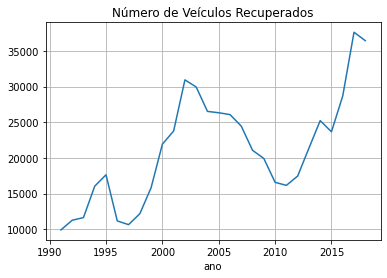

In [8]:
df_sem_2019.recuperacao_veiculos.groupby(df.ano).sum().plot(grid=True, title= 'Número de Veículos Recuperados');

Mas, como houve um aumento significativo no número de roubos de veículos, os valores absolutos de recuperações não são capazes de demonstrar um aumento de eficiência.

Para tal, iremos verificar as taxas anuais de recuperação de veículos conforme a fórmula abaixo:

$\frac{\text{recuperacao_veiculos}}{{\text{roubo_veiculo}}+\text{furto_veiculos}}$

Abaixo estão calculadas as taxas de recuperação de veículos por ano:

In [19]:
tx_recup_veiculos = (df_sem_2019.recuperacao_veiculos.groupby(df.ano).sum()/(df_sem_2019.roubo_veiculo.groupby(df.ano).sum() + df_sem_2019.furto_veiculos.groupby(df.ano).sum()))
print(tx_recup_veiculos)

ano
1991    0.244614
1992    0.215767
1993    0.224795
1994    0.298505
1995    0.386413
1996    0.289689
1997    0.256701
1998    0.283950
1999    0.315029
2000    0.481797
2001    0.513522
2002    0.561086
2003    0.560040
2004    0.511445
2005    0.487521
2006    0.457734
2007    0.459987
2008    0.425670
2009    0.438825
2010    0.426966
2011    0.469708
2012    0.455176
2013    0.467594
2014    0.501192
2015    0.493195
2016    0.490805
2017    0.537004
2018    0.536861
dtype: float64


O gráfico abaixo representa a evolução das taxas de recuperação de veículos.

Percebe-se um incremento significativo na eficiência da polícia do Rio de Janeiro, pelo menos nessa área de atuação, se comparado à decada 90. Nos últimos anos a taxa de recuperação vem apresentando uma melhora consistente.

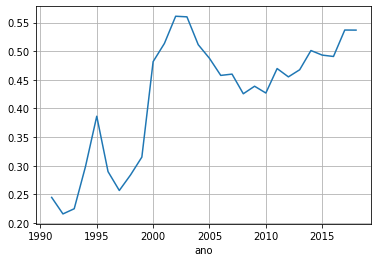

In [22]:
tx_recup_veiculos.plot(grid=True);

## Correlação entre variáveis

Um dos exercícios que a maioria das pessoas tenta fazer no seu imaginário e que os especialistas buscam estudar em detalhes, é a correlação entre as atividadades criminosas.

No gráfico de correlações abaixo, são apresentadas as principais variáveis criminais e, além disso, os homicídios por intervenção policial.






/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


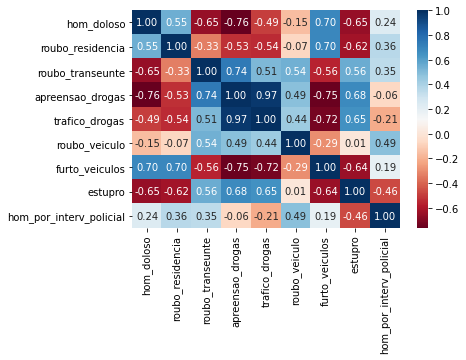

In [9]:
corr = df_sem_2019[['hom_doloso', 'roubo_residencia', 'roubo_transeunte', 'apreensao_drogas','trafico_drogas' , 'roubo_veiculo', 'furto_veiculos', 'estupro', 'hom_por_interv_policial' ]].corr()

import seaborn as sns

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=False, linecolor='white', annot=True);

Antes de apresentar qualquer análise, devemos ter sempre em mente que **correlação não significa causalidade**. Esta afirmação é valida para todas as análises que serão feitas abaixo:

A primeira informação que chama a atenção é a correlação altamente positiva entre a apreensão de drogas e os casos de tráfico de drogas (0.97).

Esta correlação parece ter forte componente causal, pois, é bastante provável que quando um traficante venha a ser detido, ele geralmente está em posse de quantidade de droga suficiente para ser classificado como tal. A recíproca também é verdadeira. Quando uma "boca de fumo" é "estourada" junto à droga costuma a haver traficantes fazendo a administração e guarda da mercadoria.


O segundo fato digno de nota refere-se à correlação da variável `apreensao_drogas` com todas as demais. É possível observar que as correlações desta variável tendem a ser comparativamente mais fortemente positivas ou negativas.

`apreensao_drogas` tem correlação significativamente positiva com `trafico_drogas`, já citado, `roubo_transeuntes`, `estupro` e, moderadamente positiva, com `roubo_veiculo`.

Como descrito anteriormente, a análise dos dados não permite apontar causas para este efeito, entretanto nos permite levantar hipóteses para este comportamento. Uma hipótese para tal efeito seria a seguinte: " O aumento na apreensão de drogas seria consequência de uma maior demanda e, consequentemente, de um maior número de usuários. Para poder manter seu vício, juntamente com as necessidades econômicas normais, o usuário passaria a buscar no roubo de transeuntes e de veículos uma forma de rápida recompensa financeira, sem a necessidade de grande planejamento". Já para o estupro, é possível que o incremento de usuários mulheres aumente a vulnerabilidade destas ou que homens quando sobre o efeito dos narcóticos sejam mais propensos a cometerem estupros. 

No sentido oposto, `apreensao_drogas` tem correlação significativamente negativa com `hom_doloso` e `furto_veiculos` e, moderadamente negativa, com `roubo_residencia`. Novamente, gostaria de reforçar que pode não haver relação causal para este fenômeno, no entanto, é possível que haja sim. Neste caso, uma hipótese para a redução do furto de veículos seria a mudança de atividade de quadrilhas, antes especializadas no furto de veículos para o tráfico de drogas (atividade mais lucrativa). O mesmo poderia ter acontecido com o roubo de residências. Essas duas atividades, em teoria, exigem mais preparação e planejamento, devendo ser executadas por criminosos mais especializados. Em relação aos homicídios dolosos o comportamento de queda tem, em meu ponto de vista, certa dificuldade em ser compreendido, apesar de acompanhar a tendência geral de redução de crimes violentos praticados por organizações criminosas mais estruturadas retratadas nas hipóteses correntes.

Por último, a variável `hom_por_interv_policial` apresenta correlação entre moderada e baixa com todas as demais. Isto pode indicar que ações policiais mais violentas tenham pouca influência sobre os resultados obtidos na repressão a ilícitos.




## E qual é a tendência apresentada em 2019 ?

Você deve se lembrar que nas análises anteriores optamos por excluir os dados de 2019, uma vez que eles haviam sido contabilizados somente até o mês de agosto. Isto traria uma distorção na comparação da série histórica. Ao mesmo tempo, não era minha intenção completar dados ainda não realizados com médias ou medianas, pois isto seria em certo ponto um exercício de futurologia propenso a  muitos erros.

Mas agora o objetivo é outro. Para observar o panorama mais atualizado da segurança pública no Estado do Rio de Janeiro, sem no entanto perder o rigor estatístico, vamos comparar os dados dos oito primeiros meses de cada ano entre 2010 e 2019.
Com isso podemos observar a tendência do ano de 2019 até em relação ao passado não muito distante.

Foi criado um novo *dataset* com os dados dos meses de janeiro a agosto dos anos de 2010 em diante.

In [0]:
df_8meses = df.copy()
df_8meses.drop(df_8meses[df_8meses.mes > 8].index, axis=0, inplace=True)
df_8meses.drop(df_8meses[df_8meses.ano < 2010].index, axis=0, inplace=True)

In [52]:
df_8meses.head(10)

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
228,2010,1,447,6.0,19,77.0,377,7716,345.0,161.0,3511.0,373,123,1945,234,5292,568,1,4.0,622.0,10.0,139.0,NaN,1036,10347,1683,2618,704.0,1768.0,NaN,8077,14850,2.0,89.0,5.0,1716.0,891,301.0,466.0,143.0,1497,1763.0,385.0,695.0,43.0,6868.0,481.0,69,2.0,3.0,3.0,549,6482,1945,56534.0,3
229,2010,2,473,3.0,6,62.0,329,7201,391.0,198.0,3267.0,348,116,1739,221,5361,582,2,1.0,546.0,6.0,123.0,NaN,1003,10048,1669,4095,710.0,1985.0,NaN,7897,16356,0.0,65.0,7.0,1628.0,865,286.0,463.0,135.0,1320,1664.0,326.0,753.0,21.0,6403.0,473.0,67,1.0,1.0,0.0,544,6489,1739,56299.0,3
230,2010,3,492,4.0,17,81.0,391,6767,341.0,186.0,3661.0,441,148,2041,229,6036,795,2,3.0,693.0,14.0,145.0,NaN,1100,11647,1713,2744,871.0,1954.0,NaN,8260,15542,2.0,169.0,12.0,2249.0,933,309.0,507.0,140.0,1584,1861.0,397.0,958.0,45.0,6618.0,447.0,57,3.0,0.0,0.0,594,7524,2041,59907.0,3
231,2010,4,432,2.0,11,102.0,347,6185,337.0,216.0,3209.0,420,113,1784,181,5581,716,2,1.0,574.0,6.0,129.0,NaN,990,10497,1594,2263,789.0,1768.0,NaN,7381,13795,0.0,140.0,6.0,1813.0,871,274.0,477.0,133.0,1378,1803.0,395.0,727.0,31.0,6051.0,437.0,45,1.0,0.0,0.0,547,6871,1784,53658.0,3
232,2010,5,361,7.0,11,109.0,345,6267,345.0,208.0,3674.0,441,132,1648,215,5749,691,2,3.0,650.0,8.0,147.0,NaN,963,10649,1670,2639,868.0,1941.0,NaN,8052,15170,0.0,122.0,5.0,2215.0,1038,351.0,557.0,151.0,1438,2031.0,409.0,1197.0,41.0,5892.0,403.0,44,2.0,1.0,0.0,488,7090,1648,58057.0,3
233,2010,6,347,7.0,12,74.0,278,6153,347.0,185.0,3462.0,363,121,1699,212,5083,669,1,2.0,613.0,12.0,124.0,NaN,896,9795,1585,2510,815.0,1846.0,NaN,7508,14264,0.0,107.0,11.0,2032.0,1006,355.0,518.0,154.0,1399,1675.0,347.0,1065.0,30.0,5707.0,402.0,46,2.0,0.0,0.0,440,6365,1699,53942.0,3
234,2010,7,324,3.0,12,58.0,288,6050,402.0,206.0,3636.0,372,103,1666,209,5143,784,1,4.0,589.0,9.0,141.0,NaN,860,9881,1557,2416,715.0,1850.0,NaN,7614,14152,0.0,99.0,7.0,2096.0,1044,397.0,537.0,123.0,1452,1718.0,363.0,1142.0,34.0,6146.0,439.0,29,1.0,3.0,0.0,397,6516,1666,55674.0,3
235,2010,8,344,8.0,12,30.0,333,6412,402.0,178.0,3889.0,362,120,1558,184,5166,695,1,2.0,543.0,10.0,161.0,NaN,832,9634,1628,2384,873.0,1875.0,NaN,7611,14371,1.0,119.0,14.0,2094.0,1071,462.0,514.0,126.0,1414,1916.0,376.0,1335.0,43.0,6458.0,436.0,33,2.0,0.0,1.0,394,6404,1558,56596.0,3
240,2011,1,425,5.0,9,61.0,413,8272,396.0,179.0,3923.0,409,92,1567,231,4771,616,4,1.0,505.0,4.0,138.0,NaN,865,9203,1423,2822,763.0,2037.0,NaN,7969,15014,2.0,143.0,14.0,2025.0,1068,428.0,527.0,136.0,1375,1858.0,409.0,867.0,42.0,7403.0,488.0,52,1.0,0.0,0.0,500,5892,1567,57852.0,3
241,2011,2,368,2.0,7,39.0,379,7844,416.0,187.0,3727.0,453,81,1490,234,4742,588,3,2.0,516.0,8.0,185.0,NaN,835,9137,1227,3130,851.0,2022.0,NaN,7951,15181,0.0,144.0,5.0,2121.0,1094,430.0,521.0,165.0,1288,1874.0,405.0,853.0,41.0,7172.0,451.0,47,2.0,0.0,0.0,416,5846,1490,57840.0,3


O gráfico de linhas abaixo mostra os principais indicadores criminais na última década (no período compreendido entre janeiro e agosto do respectivo ano):

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


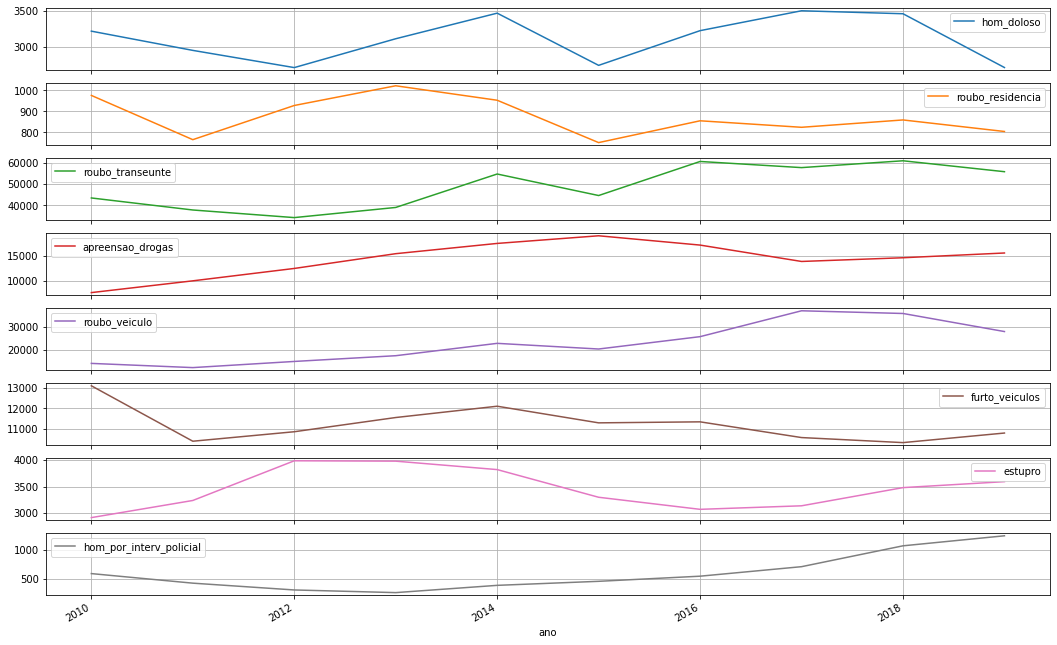

In [16]:
df_8meses.groupby(df_8meses.ano)['hom_doloso', 'roubo_residencia', 'roubo_transeunte', 'apreensao_drogas', 'roubo_veiculo', 'furto_veiculos', 'estupro', 'hom_por_interv_policial'].sum().plot(subplots=True, grid= True, figsize=(18,12));

O ano de 2019, até o momento do fechamento dos dados, apresentava uma tendência de redução nos crimes mais violentos como homicídios dolosos, roubo de residências, roubo de transeuntes e roubo de veículos, principalemnte na comparação com 2018.

Por outro lado, houve aumento na apreensão de drogas, furto de veículos, estupro e nos homicídios por intervenção policial no mesmo período.

# Conclusão

Este trabalho teve como objetivo traçar um panorama da segurança pública no Estado do Rio de Janeiro por meio de uma análise de *Data Science*. Os dados utilizados estão à disposição de toda a sociedade e são uma fonte valiosa para entender esta questão fundamental para vida das pessoas.

Na primeira parte do artigo foram apresentados as séries históricas relativas aos principais indicadores de segurança pública. A análise dos gráficos permite ao leitor aumentar sua consciência sobre o panorama da segurança no Rio de Janeiro.

Na parte final desta apresentação é possível ver a correlação entre as variáveis. Além da apresentação dos valores, algumas correlações foram evidenciadas. Como descrito naquele trecho, as correlações  podem não ter fundamento causal. As hipóteses ali colocadas visam enriquecer o debate e, quem sabe, sucitar novos estudos relacionados ao tema, de forma a confirmar ou refutar aquelas colocações. Não é a intenção deste autor tentar explicar comportamentos humanos complexos por meios desta análise de dados, quanto mais quando estes dados não permitem realizar tal análise.

Caso você possa trazer contribuições ao artigo, sinta-se à vontade para entrar em contato.

Um grande abraço.